# S&P500 Historical Returns Visualisations

In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
quant_pastel = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(quant_pastel)
%config InlineBackend.figure_format ='retina'

In [1]:
# data_daily = yf.download('^SPX')
# data_weekly = yf.download('^SPX', interval='1wk')
# data_monthly = yf.download('^SPX', interval='1mo')

data = yf.download('^SPX', interval='1wk')
data.head()

/Users/dialidsantiago/Git/Quant-Girl-Blog/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-26,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-02,17.760000,17.760000,17.549999,17.660000,17.660000,0
1928-01-09,17.500000,17.580000,17.350000,17.580000,17.580000,0
1928-01-16,17.290001,17.480000,17.260000,17.480000,17.480000,0
1928-01-23,17.639999,17.709999,17.520000,17.690001,17.690001,0


In [2]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,4745.200195,4754.330078,4682.109863,4697.240234,4697.240234,15253660000
2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000
2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000
2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000
2024-01-29,4892.950195,4975.290039,4845.149902,4968.390137,4968.390137,18425960224


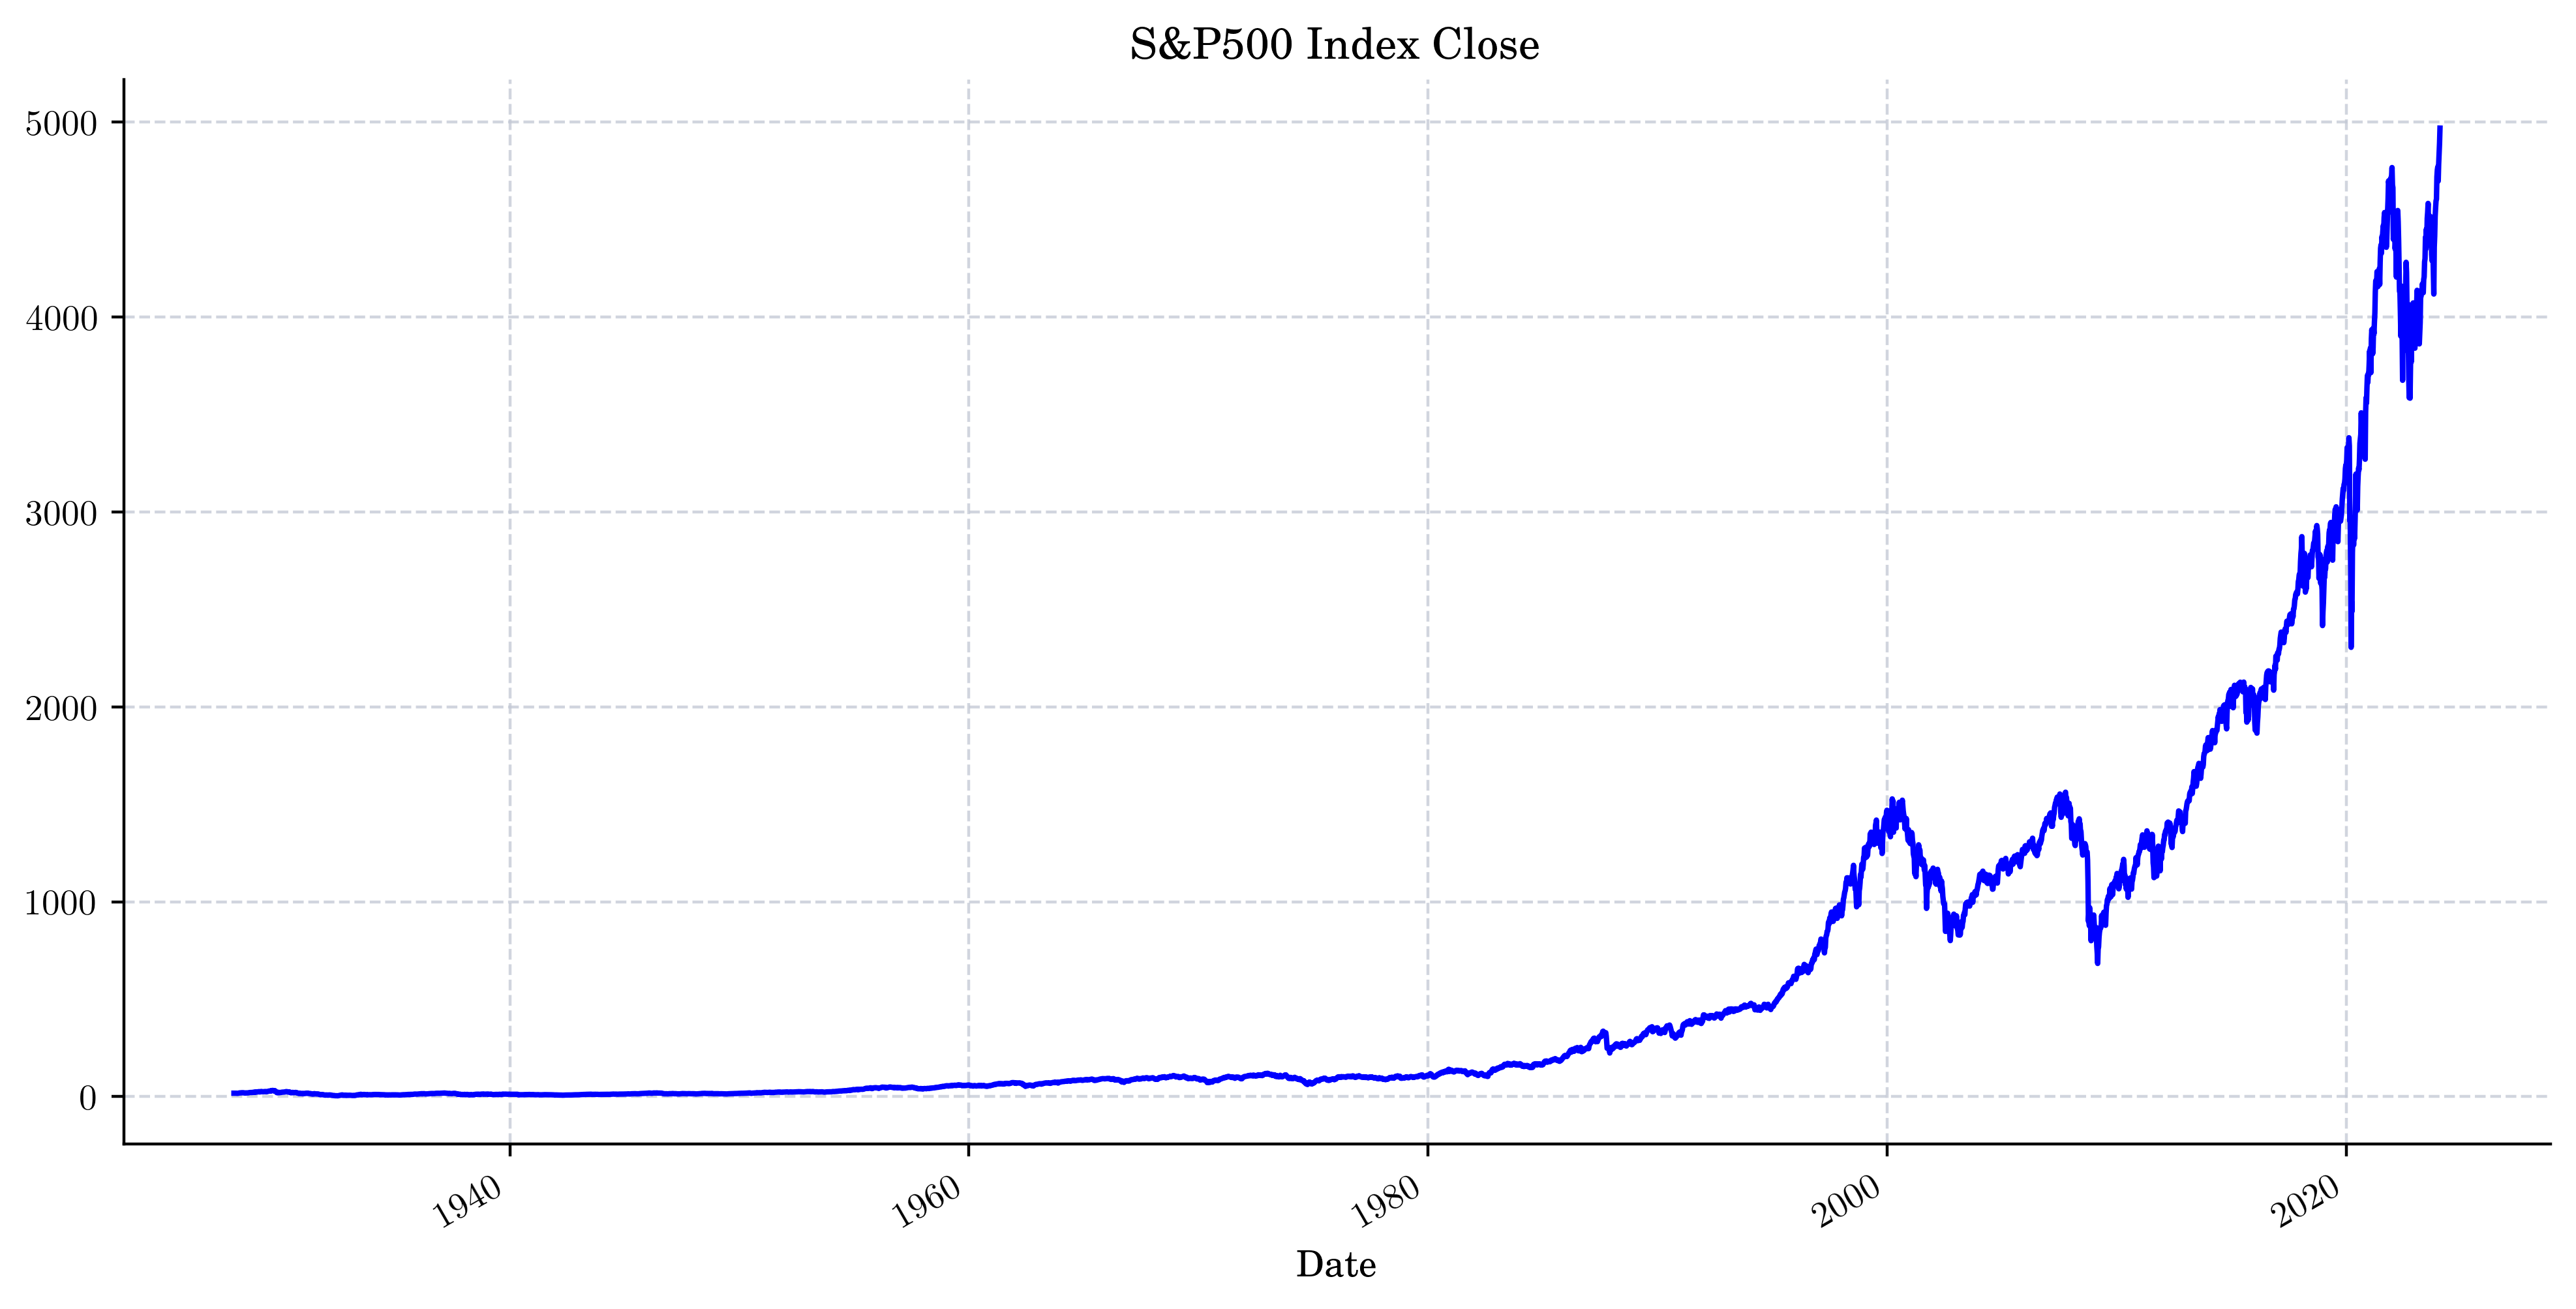

In [3]:
plt.figure(figsize=(12, 6))
data['Close'].plot(color='blue', title="S\&P500 Index Close")
plt.show()

In [4]:
import numpy as np
kind = 'standard'

df = data

if kind == 'standard':
    column = 'Returns'
    df.loc[:, column] = 100*(df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close']

elif kind == 'log':

    column = 'Log-Returns'
    df.loc[:, column] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

df = df.reset_index()
df['year'] = df['Date'].dt.year
df['Decade'] = [int(np.floor(year/10) * 10) for year in np.array(df["year"])]
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
1,1928-01-02,17.760000,17.760000,17.549999,17.660000,17.660000,0,0.000000,1928,1920
2,1928-01-09,17.500000,17.580000,17.350000,17.580000,17.580000,0,-0.455062,1928,1920
3,1928-01-16,17.290001,17.480000,17.260000,17.480000,17.480000,0,-0.572085,1928,1920
4,1928-01-23,17.639999,17.709999,17.520000,17.690001,17.690001,0,1.187117,1928,1920
5,1928-01-30,17.490000,17.629999,17.400000,17.400000,17.400000,0,-1.666672,1928,1920


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,year,Decade
5009,2024-01-01,4745.200195,4754.330078,4682.109863,4697.240234,4697.240234,15253660000,-1.545372,2024,2020
5010,2024-01-08,4703.700195,4802.399902,4699.819824,4783.830078,4783.830078,18017190000,1.810053,2024,2020
5011,2024-01-15,4772.350098,4842.069824,4714.819824,4839.810059,4839.810059,16495350000,1.156657,2024,2020
5012,2024-01-22,4853.419922,4906.689941,4844.049805,4890.970215,4890.970215,19914270000,1.046012,2024,2020
5013,2024-01-29,4892.950195,4975.290039,4845.149902,4968.390137,4968.390137,18425960224,1.558250,2024,2020


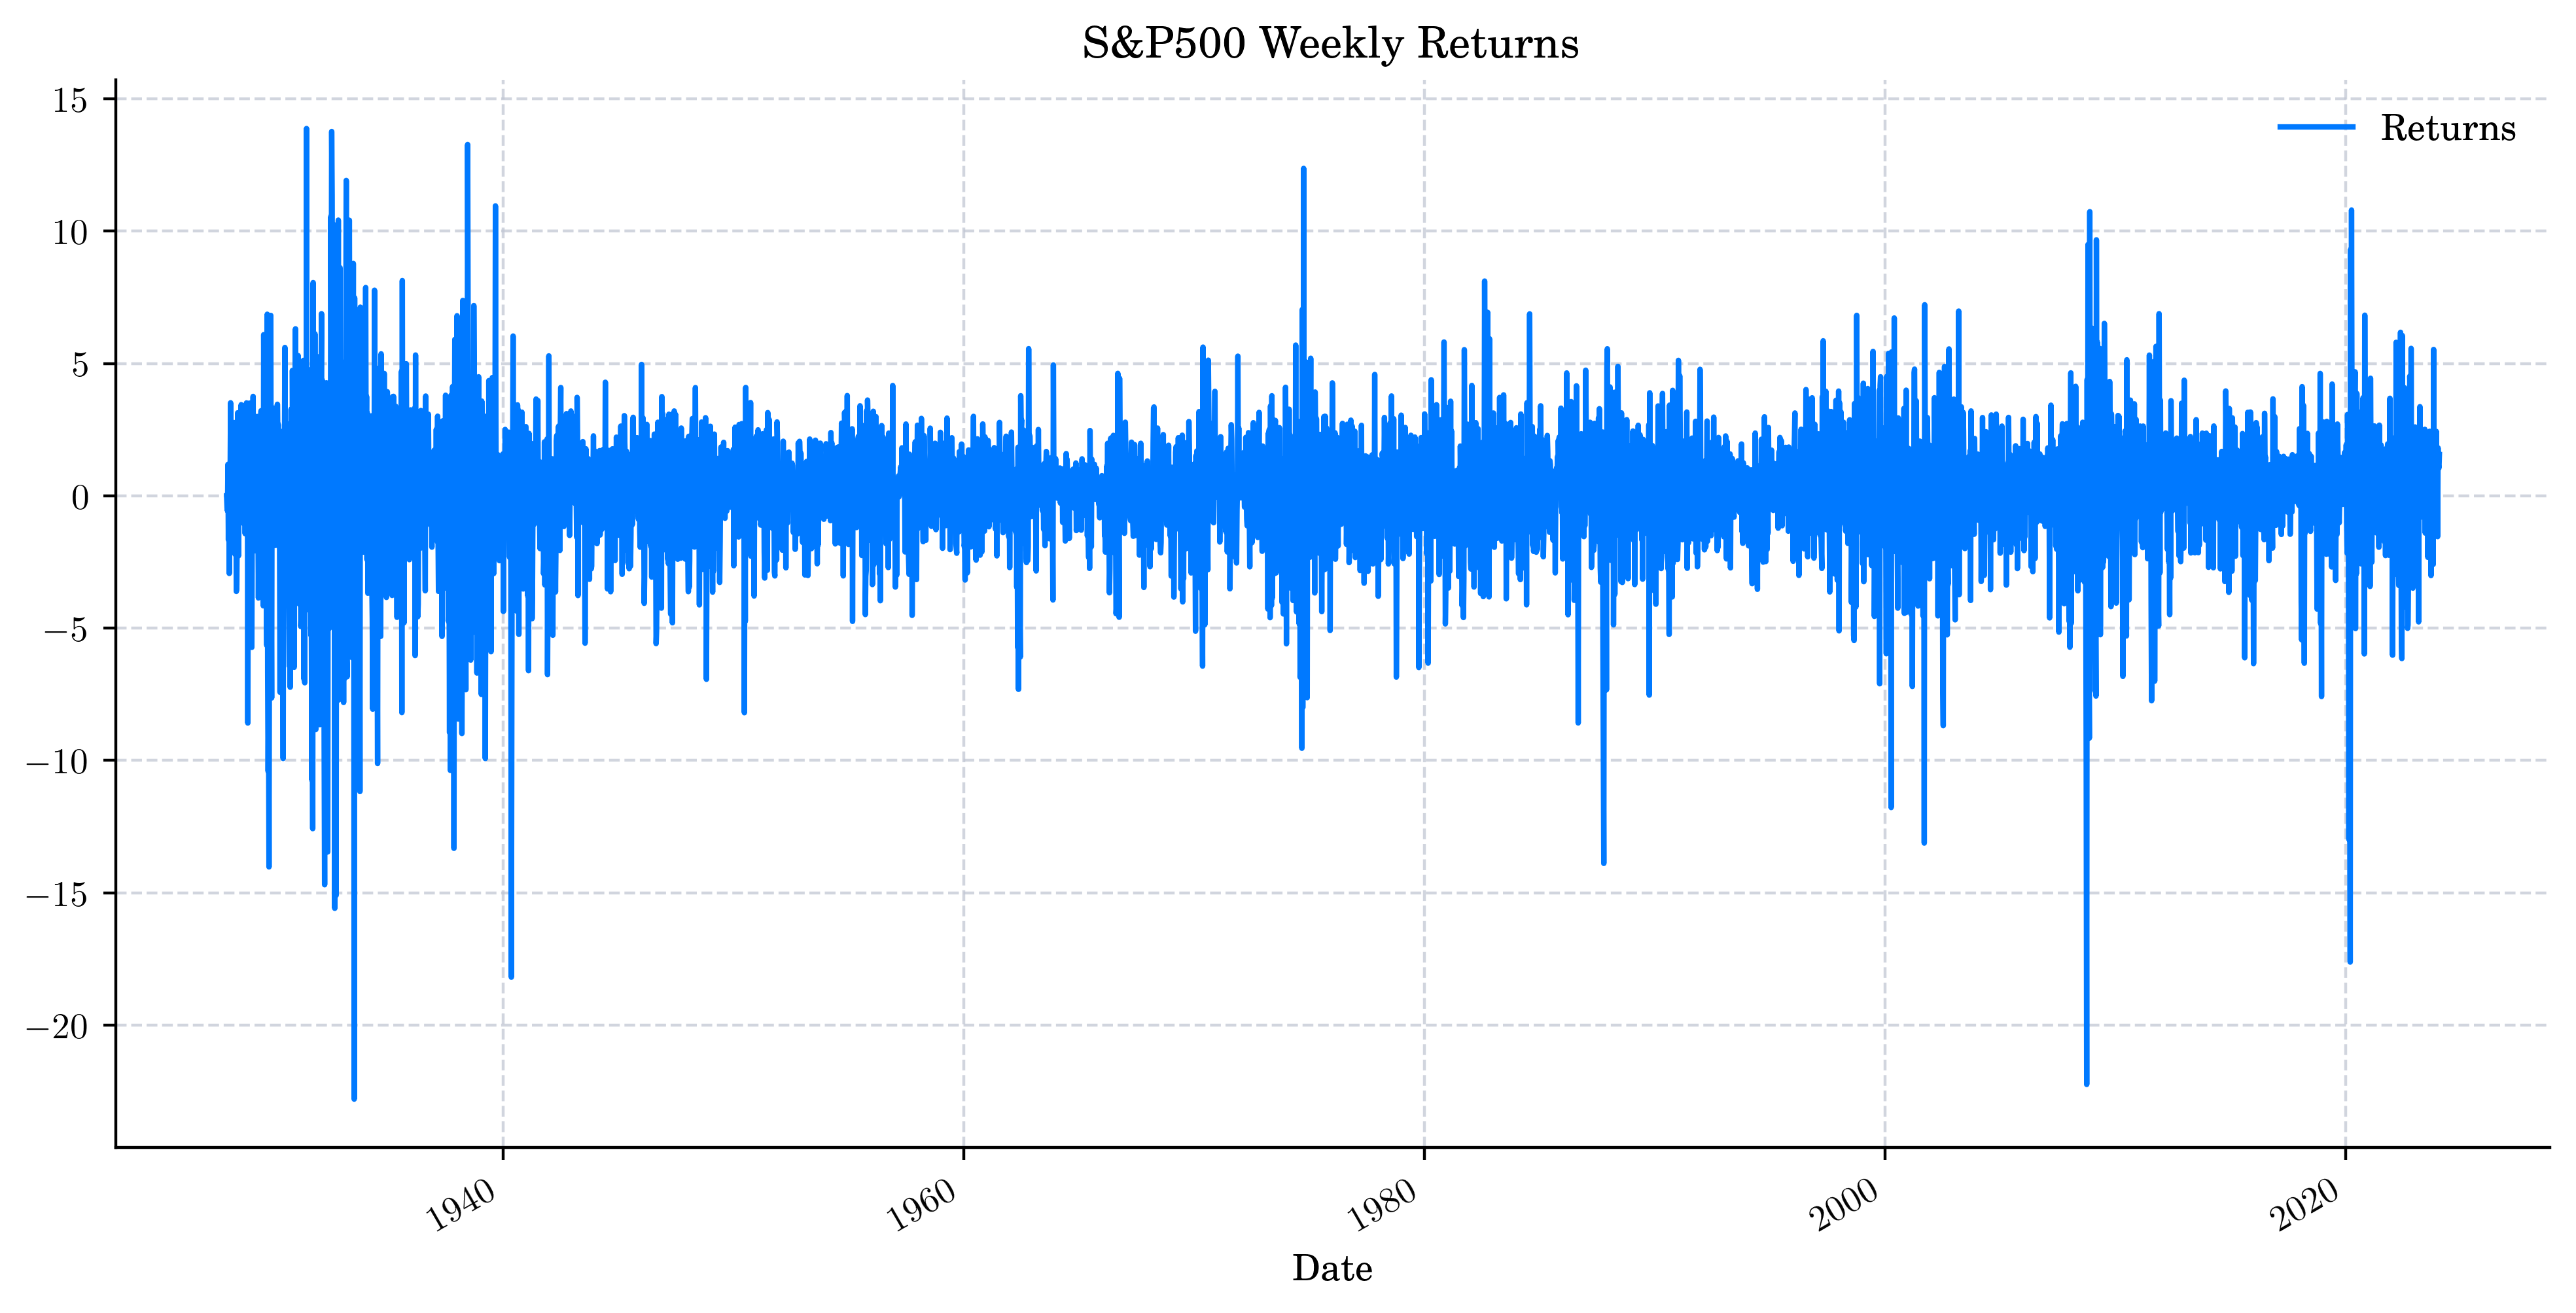

In [6]:
fig = df.plot(x='Date', y ='Returns', figsize=(12, 6), title='S\&P500 Weekly Returns')
plt.show()

In [7]:
import plotly.express as px
fig = px.line(df, x='Date', y='Returns',title='S&P500 Weekly Returns')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(template="plotly_white")
fig.show()

In [8]:
# import plotly.express as px 
dta =df
fig = px.box(data_frame=dta,  x='Decade', y='Returns', labels={'Returns':"Returns (%)"},
             color='Decade',
            hover_data={'Date': True, 'Returns': ':.2f', 'High': ':.2f', 'Decade':False},
                notched=True, color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.update_layout(
    title='S&P500 Historical Weekly Returns',
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        # gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    # paper_bgcolor='rgb(243, 243, 243)',
    # plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)
fig.update_layout(template="plotly_white")
                  
fig.show()

/Users/dialidsantiago/Git/Quant-Girl-Blog/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



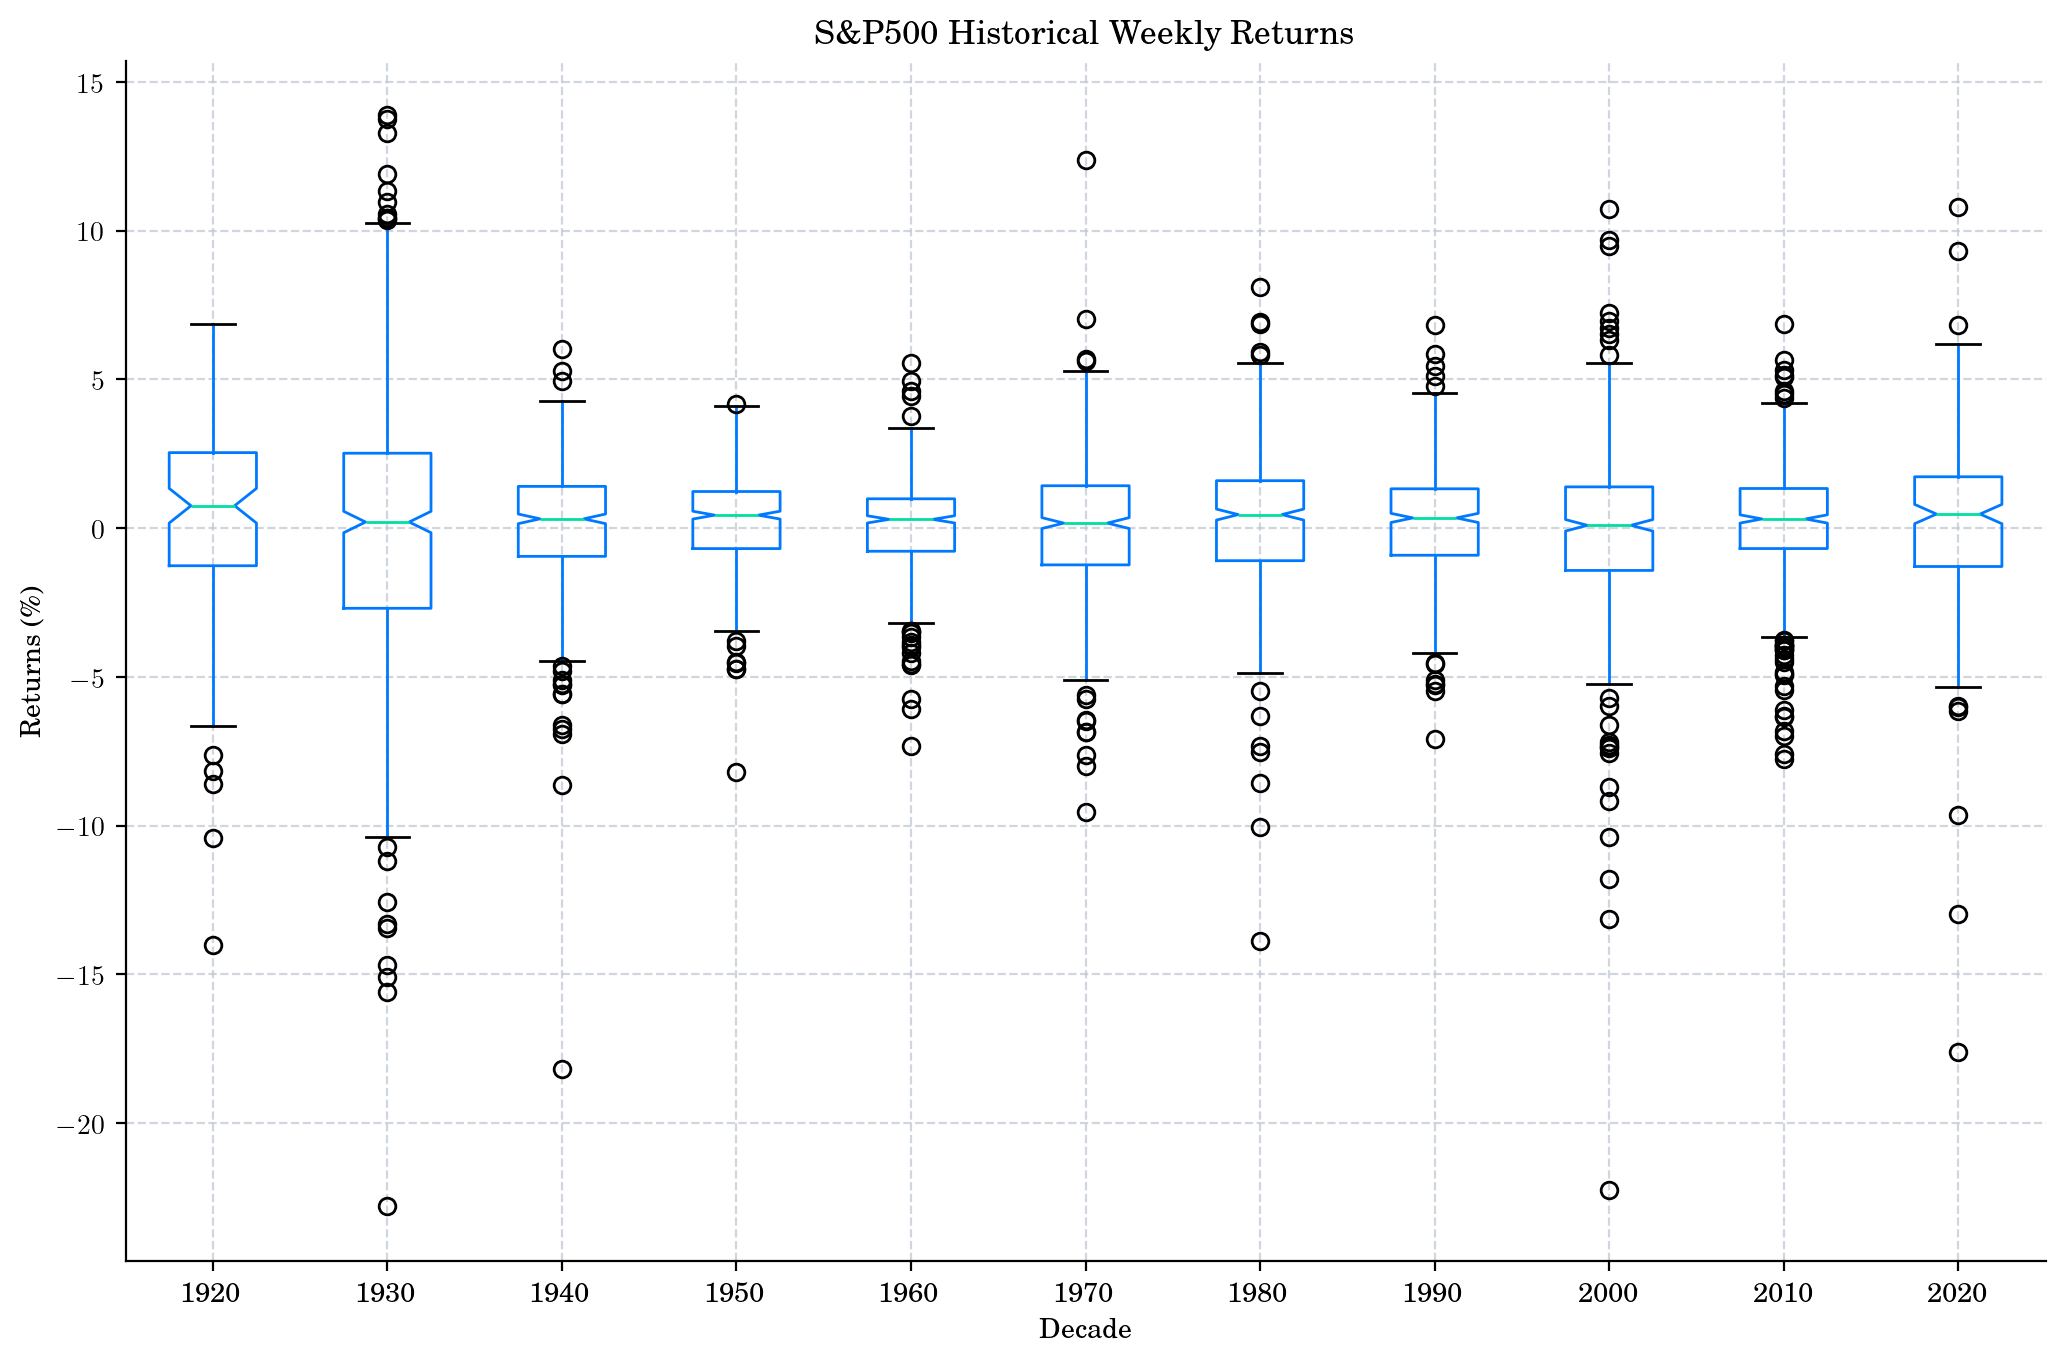

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8),dpi=100)
box = df.boxplot(by='Decade', column='Returns', ax=ax, notch=True)
ax.set_title('S\&P500 Historical Weekly Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (\%)')
plt.suptitle('') 
plt.show()

In [10]:
# import plotly.express as px 
palette = px.colors.qualitative.Pastel
colors = [(a/255, b/255, c/255) for (a,b,c) in [eval(p[4:-1]) for p in palette]]
colors_transparent1 = [(a/255, b/255, c/255, 0.7) for (a,b,c) in [eval(p[4:-1]) for p in palette]]
colors_transparent2 = [(a/255, b/255, c/255, 0.15) for (a,b,c) in [eval(p[4:-1]) for p in palette]]

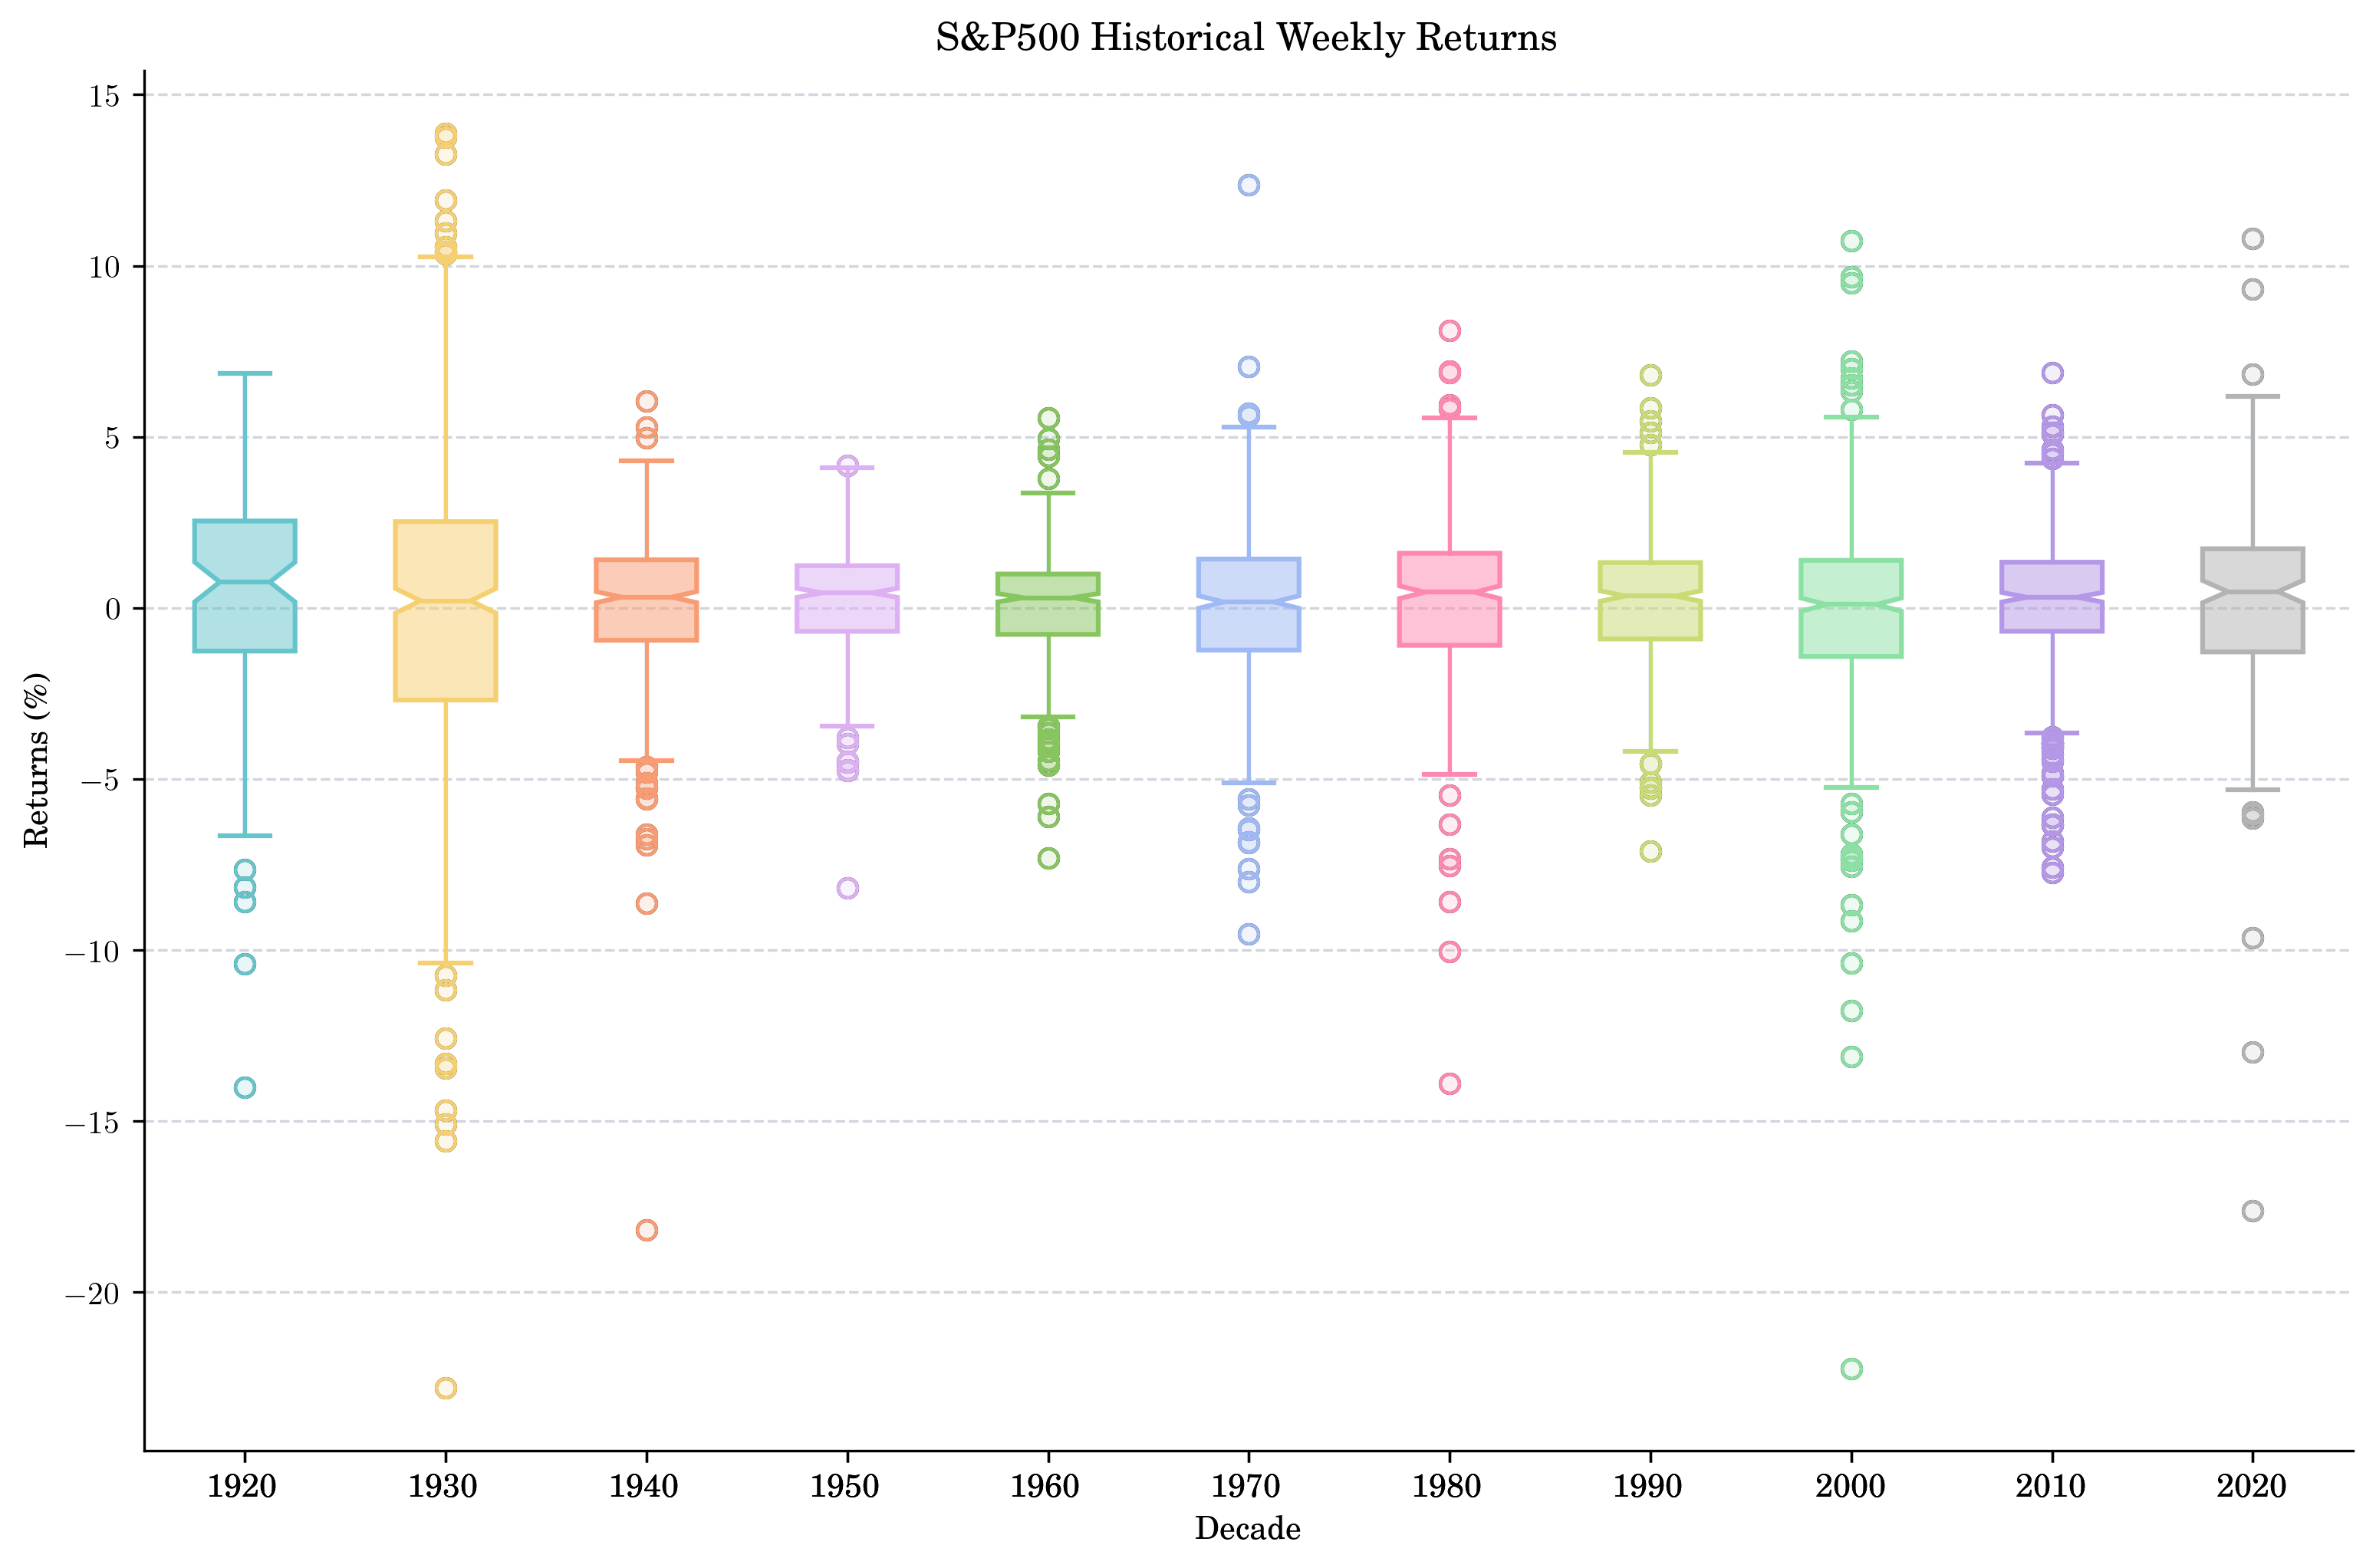

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8),dpi=150)


box = df.boxplot(by='Decade', column='Returns', ax=ax, return_type='dict', patch_artist=True, notch=True)

for patch, flier, median, color in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors_transparent1):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

box = df.boxplot(by='Decade', column='Returns', ax=ax,
                 return_type='dict', patch_artist=True, notch=True,  
                 boxprops={'fill': None}
                 )

for patch, flier, median,  color, colort2 in zip(box['Returns']['boxes'],  
                                                         box['Returns']['fliers'], 
                                                         box['Returns']['medians'], 
                                                         colors, colors_transparent2):
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
    median.set_color(color)
    median.set_linewidth(1.5)
    flier.set_markerfacecolor(colort2)
    flier.set_markeredgecolor(color)
    
w = box['Returns']['whiskers']
for (a, b), c in zip(zip(w[0::2], w[1::2]),colors):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.25)
    b.set_linewidth(1.25)
    
caps= box['Returns']['caps']
for (a, b), c in zip(zip(caps[0::2], caps[1::2]),colors):
    a.set_color(c)
    b.set_color(c)
    a.set_linewidth(1.5)
    b.set_linewidth(1.5)

# ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray', linestyle='dashed')
ax.grid(visible=False, axis='x')

ax.set_title('S\&P500 Historical Weekly Returns')
ax.set_xlabel('Decade')
ax.set_ylabel('Returns (\%)')
plt.suptitle('') 

plt.show()